In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1)  Load the houseprices data 

In [2]:
df = pd.read_csv('houseprices.cvs')

### 2) Split your data into train and test sets.
First, determine the target variable ('saleprice') and features(num_col and cat_col).  Splitting data into train and test sets can easily be done with sklearn's train_test_split function.

In [3]:
num_col = ['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf']
cat_col = ['exterqual', 'kitchenqual']

In [4]:
df2 = pd.concat([df[num_col], df[cat_col], df['saleprice']], axis = 1)

In [5]:
for col in cat_col:
    df2 = pd.concat([df2, pd.get_dummies(df[col], drop_first=True, prefix = col)], axis = 1)

In [6]:
Y = df2['saleprice']
X = df2.drop(['saleprice', 'exterqual', 'kitchenqual'], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### 3) Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [8]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     341.8
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:57   Log-Likelihood:                -13923.
No. Observations:                1168   AIC:                         2.787e+04
Df Residuals:                    1155   BIC:                         2.794e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.006e+04   1.27e+04      2.

R-squared and adjusted R-squared values are 0.780 and 0.778 respectively.  These numbers are a good starting point, but can be improved.  

F-statistic and its corresponding p-value are 341.8 and ~0 respectively, which tells us that the model to some degree explains the target variable.

Lastly, the AIC and BIC are 2.787e+04 and 2.794e+04 respectively.

### 4) Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.  Is the performance of your model satisfactory? Why?

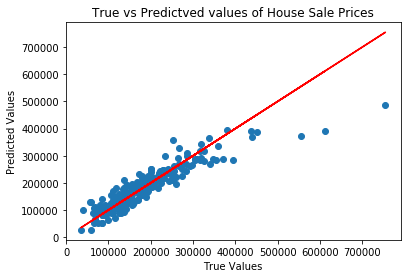

In [9]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predictved values of House Sale Prices')

In [10]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 23426.644247539654
Mean squared error of the prediction is: 1303789351.8254063
Root mean squared error of the prediction is: 36108.023371896255
Mean absolute percentage error of the prediction is: 14.811800268428533


The plot gives us an idea if the model's predictions are good or bad.  For the most part it looks like it predicts pretty well until ~\$350, then above that number the predictions are too low. The evaluation metrics are printed above.  It is difficult to say if they are good or bad without comparing to another model.  The exception is mean absolute percentage error (MAPE), which has a 14% error.  As a first model this sounds decent, but probably can be improved.

### 5) Try to improve your model in terms of predictive performance by adding or removing some variables.
I found the best way to improve the model was to take the log of the sale price.  Metrics are printed at the bottom, but they are significantly better than the first model.  MAE, MSE, and RMSE are all under 1 and MAPE is ~1%.

In [11]:
df2['sumqual'] = df2['exterqual_Fa'] + df2['exterqual_Gd'] + df2['exterqual_TA'] + df2['kitchenqual_Fa'] + df2['kitchenqual_Gd'] + df2['kitchenqual_TA']
df2['prodqual'] = df2['exterqual_Fa'] * df2['exterqual_Gd'] * df2['exterqual_TA'] * df2['kitchenqual_Fa'] * df2['kitchenqual_Gd'] * df2['kitchenqual_TA']
df2['totalarea'] = df2['grlivarea'] + df2['totalbsmtsf'] + df2['firstflrsf'] + df2['garagearea']

In [12]:
Y2 = np.log(df2['saleprice'])
X2 = pd.concat([df2.drop(['saleprice', 'exterqual', 'kitchenqual'], axis = 1), df2['sumqual']], axis = 1)
X2 = sm.add_constant(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)
X2_train = sm.add_constant(X2_train)
results2 = sm.OLS(y2_train, X2_train).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     385.9
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:43:57   Log-Likelihood:                 380.27
No. Observations:                1168   AIC:                            -734.5
Df Residuals:                    1155   BIC:                            -668.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.9090      0.061    179.

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


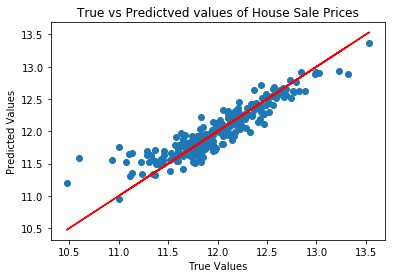

In [13]:
X2_test = sm.add_constant(X2_test)
y2_preds = results2.predict(X2_test)

plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color = 'red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predictved values of House Sale Prices')

In [14]:
print("Mean absolute error of the second prediction is: {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Mean squared error of the second prediction is: {}".format(mse(y2_test, y2_preds)))
print("Root mean squared error of the second prediction is: {}".format(rmse(y2_test, y2_preds)))
print("Mean absolute percentage error of the second prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

Mean absolute error of the second prediction is: 0.12340351327047608
Mean squared error of the second prediction is: 0.030593672673697957
Root mean squared error of the second prediction is: 0.1749104704518799
Mean absolute percentage error of the second prediction is: 1.04459686965894
